Completed Testing

The goal is to write a program that will normalize our images, see what it does to the image quality, and eventually incorporate into our models. Ideally, image normalization will help improve generalizability of our model across different batches of images, improving some problems with existing CV models that have been used on this dataset in the past.

In [10]:
import os
import pandas as pd
import torch
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score
from tqdm import tqdm
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'distribution of pixels')

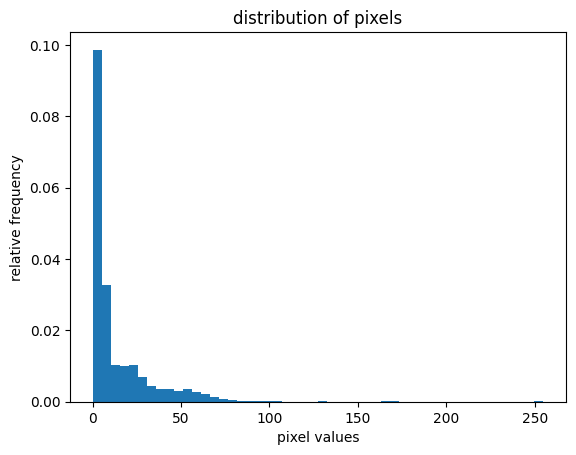

In [11]:
# Start: test on a single image

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

sample_img_path = '/content/drive/MyDrive/Fall 2024 Classes/Capstone: CV for Infant Lumbar Puncture/Data Files/short axis frames/LPPILOTLAT1/89.jpg'
img = Image.open(sample_img_path)

img_np = np.array(img)

plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

Text(0.5, 1.0, 'distribution of pixels')

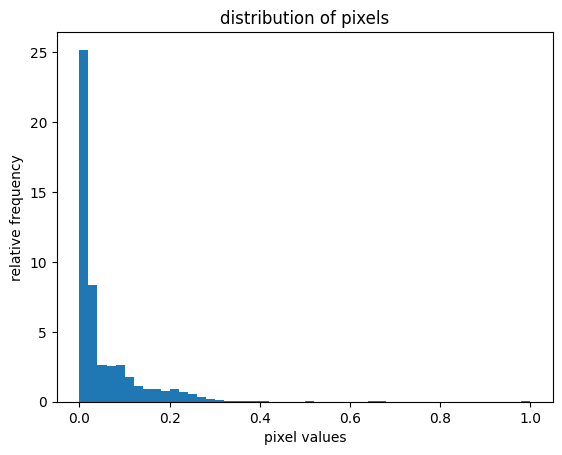

In [12]:
# import necessary libraries
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# define custom transform function
transform = transforms.Compose([
    transforms.ToTensor()
])

# transform the pIL image to tensor
# image
img_tr = transform(img)

# Convert tensor image to numpy array
img_np = np.array(img_tr)

# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

In [13]:
# Python code to calculate mean and std
# of image

# get tensor image
img_tr = transform(img)

# calculate mean and std
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])

# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

mean and std before normalize:
Mean of the image: tensor([0.0518, 0.0518, 0.0513])
Std of the image: tensor([0.0842, 0.0842, 0.0810])


Text(0.5, 1.0, 'distribution of pixels')

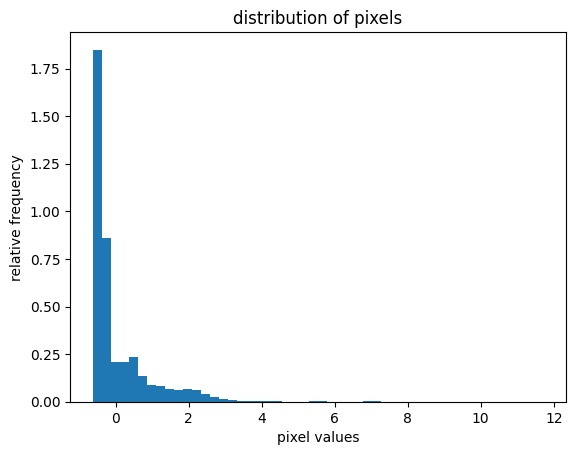

In [14]:
# python code to normalize the image


from torchvision import transforms

# define custom transform
# here we are using our calculated
# mean & std
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# get normalized image
img_normalized = transform_norm(img)

# convert normalized image to numpy
# array
img_np = np.array(img_normalized)

# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

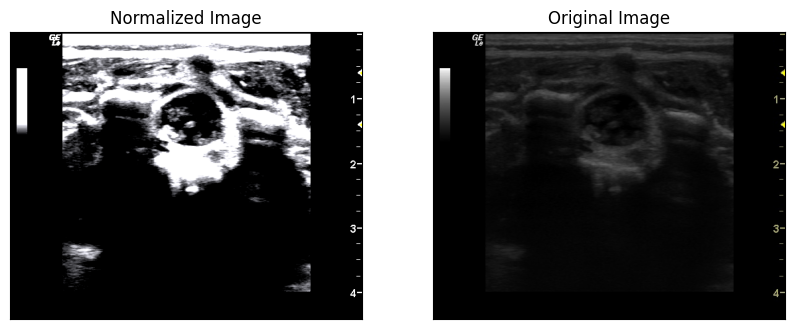

In [17]:
# Python Code to visualize normalized image

# get normalized image
img_normalized = transform_norm(img)

# convert this image to numpy array
img_normalized = np.array(img_normalized)

# transpose from shape of (3,,) to shape of (,,3)
img_normalized = img_normalized.transpose(1, 2, 0)

import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image (img_normalized)
axs[0].imshow(img_normalized)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title('Normalized Image')

# Plot the second image (img)
axs[1].imshow(img)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title('Original Image')

# Display the plot
plt.show()

In [16]:
# Python code to calculate mean and std
# of normalized image

# get normalized image
img_nor = transform_norm(img)

# cailculate mean and std
mean, std = img_nor.mean([1,2]), img_nor.std([1,2])

# print mean and std
print("Mean and Std of normalized image:")
print("Mean of the image:", mean)
print("Std of the image:", std)

Mean and Std of normalized image:
Mean of the image: tensor([-2.1611e-08, -3.4101e-08, -8.5121e-08])
Std of the image: tensor([1., 1., 1.])
